# Step 2: Load and Prepare the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv(r"C:\Users\ACER\Downloads\ecommerce_sales_analysis_project\data\ecommerce_orders.csv")
Data1 = pd.DataFrame(Data)
Data.head()

,OrderID,CustomerID,OrderDate,Category,OrderValue,DiscountApplied,PaymentMethod,Revenue
0,1001,7,2024-01-01,Home & Kitchen,156.59,5,Net Banking,148.76
1,1002,20,2024-01-02,Books,105.24,10,PayPal,94.72
2,1003,15,2024-01-03,Books,107.73,5,Credit Card,102.34
3,1004,11,2024-01-04,Clothing,97.77,0,Net Banking,97.77
4,1005,8,2024-01-05,Home & Kitchen,42.44,20,PayPal,33.95


In [5]:
# Convert to datetime &  Extract month
Data1["OrderDate"] = pd.to_datetime(Data1["OrderDate"])
Data1["Month"] = Data1["OrderDate"].dt.to_period("M")

#  Step 3: Explore the Data

In [6]:
print(Data1.info())
print(Data1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          100 non-null    int64         
 1   CustomerID       100 non-null    int64         
 2   OrderDate        100 non-null    datetime64[ns]
 3   Category         100 non-null    object        
 4   OrderValue       100 non-null    float64       
 5   DiscountApplied  100 non-null    int64         
 6   PaymentMethod    100 non-null    object        
 7   Revenue          100 non-null    float64       
 8   Month            100 non-null    period[M]     
dtypes: datetime64[ns](1), float64(2), int64(3), object(2), period[M](1)
memory usage: 7.2+ KB
None
           OrderID  CustomerID            OrderDate  OrderValue  \
count   100.000000  100.000000                  100  100.000000   
mean   1050.500000   10.010000  2024-02-19 12:00:00  101.712700   
min    1001.0

# Step 4: Revenue Over Time

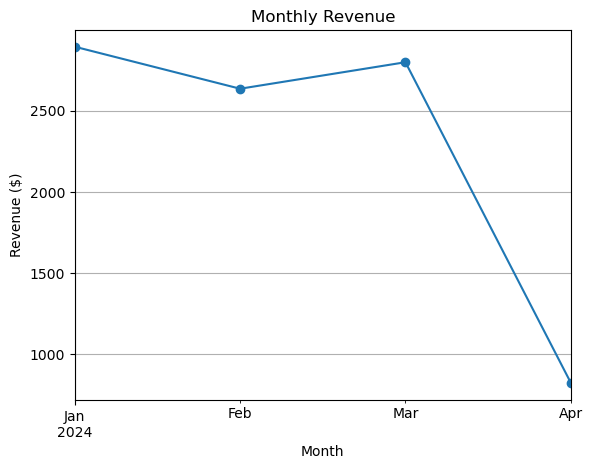

In [8]:
# Plot monthly revenue trend:
# Insight Spot upward or downward trends in monthly revenue.

monthly_revenue = Data1.groupby('Month')['Revenue'].sum()
monthly_revenue.plot(kind='line', marker='o', title='Monthly Revenue')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()

# Step 5: Revenue by Product Category

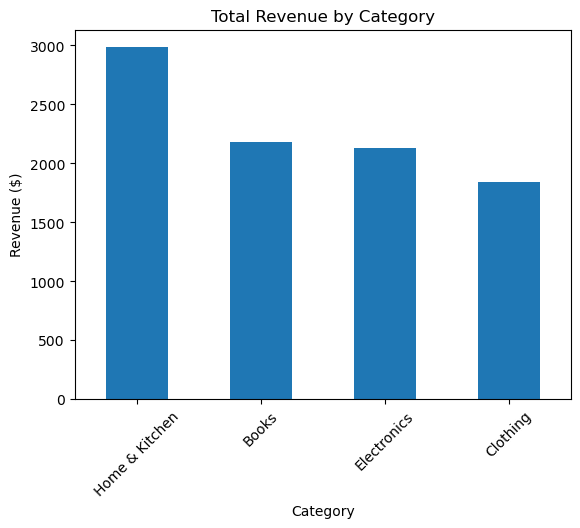

In [9]:
# Visualize which product categories perform best:
# Find top-selling categories like Electronics or Clothing.

category_rev = Data1.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
category_rev.plot(kind='bar', title='Total Revenue by Category')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()


# Step 6: Analyze Payment Methods

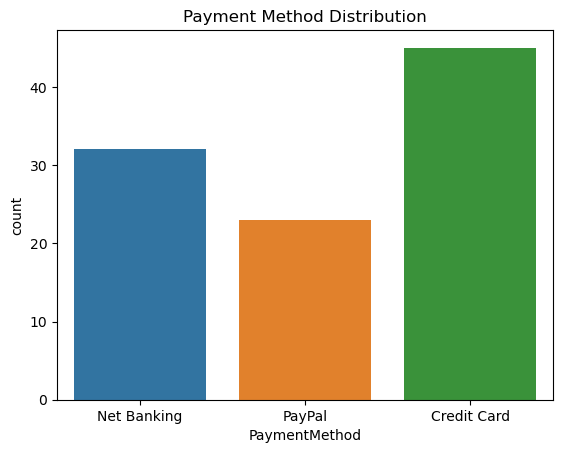

In [11]:
# Check customer preferences:
# See if Credit Card is most used, or if PayPal/Net Banking is rising.

sns.countplot(x='PaymentMethod', data=Data1)
plt.title('Payment Method Distribution')
plt.xticks(rotation=0)
plt.show()


# Step 7: Optional Deep-Dive Ideas

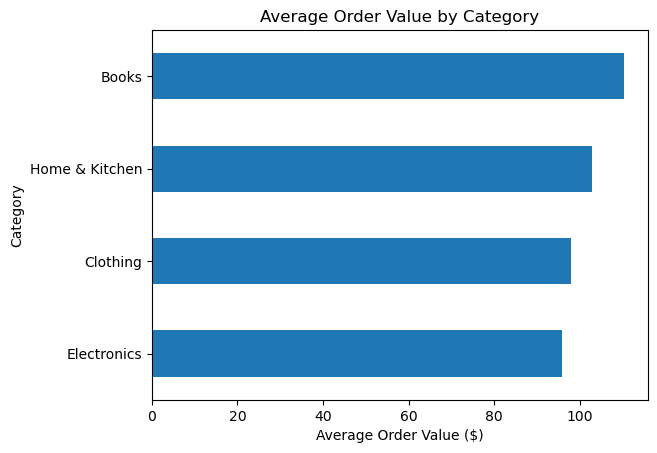

In [12]:
Data1.groupby('Category')['OrderValue'].mean().sort_values().plot(kind='barh', title='Average Order Value by Category')
plt.xlabel('Average Order Value ($)')
plt.show()


# Step 8: Document Your Insights

•	Trends in revenue
•	Top-performing categories
•	Popular payment methods
•	Business recommendations (e.g. promote best-sellers)
